# Quantum Fourier Transformation

In [1]:
%matplotlib inline
from IPython.display import Image
from numpy import pi
import numpy as np
from qutip import *
from qutip.qip.operations import *
from qutip.qip.circuit import QubitCircuit, Gate
import math
from math import sin, cos

In [2]:
import sys
sys.path.append('..')
sys.path.append('../library')
from library.my_quantum_tool import *
from library.my_gate import ccphase, pauli_x, ncnot

In [3]:
qubit_num = 3
reverse_states = False

In [4]:
inital_state = InitializedState('010')  # 这个表示的是3, 001代表的是1, 及电路最上面那个是1
parseStateVecPd(inital_state)

,000,001,010,011,100,101,110,111
state,,,1.0,,,,,


In [5]:
inital_state?

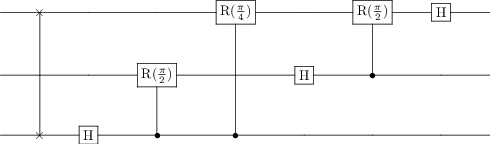

In [6]:
def invQFT():
    qc = QubitCircuit(qubit_num, reverse_states=False)
    qc.add_gate('SWAP', targets=[0, qubit_num-1])
    
    for qubit1 in range(qubit_num-1, -1, -1):
        qc.add_gate('SNOT', targets=[qubit1])
        for qubit2 in range(qubit1-1, -1, -1):
            index = abs(qubit2 - qubit1)
            index = 2 ** index
            qc.add_gate('CPHASE', controls=[qubit1], targets=[qubit2], arg_value=pi/(index), arg_label=r'\frac{\pi}{'+f'{index}' + r'}')
    return qc
invqft_gates = invQFT()
invqft_gates.png

In [7]:
# def invQFT():
#     qc = QubitCircuit(qubit_num, reverse_states=reverse_states)
#     qc.add_gate('SWAP', targets=[0, qubit_num-1])
    
#     for qubit1 in range(0, qubit_num):
#         qc.add_gate('SNOT', targets=[qubit1])
#         for qubit2 in range(qubit1+1, qubit_num):
#             index = abs(qubit2 - qubit1)
#             index = 2 ** index
#             qc.add_gate('CPHASE', controls=[qubit1], targets=[qubit2], arg_value=pi/(index), arg_label=r'\frac{\pi}{'+f'{index}' + r'}')
#     return qc
# invqft_gates = invQFT()
# invqft_gates.png

相对于qc engine, 上面的在前0，下面的在后qubit_num
0x1  0x2  0x4  0x8

In [8]:
invqft_matrixs = invqft_gates.propagators()
invqft_matrix = dot(*invqft_matrixs)
paresGateMatrixPd(invqft_matrix)
# 对于矩阵来说列标签(水平)是输入，行标签(竖直)是输出

,000,001,010,011,100,101,110,111
000,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35
001,0.35,0.35|45,0.35|90,0.35|135,0.35|-180,0.35|-135,0.35|-90,0.35|-45
010,0.35,0.35|90,0.35|-180,0.35|-90,0.35,0.35|90,0.35|-180,0.35|-90
011,0.35,0.35|135,0.35|-90,0.35|45,0.35|-180,0.35|-45,0.35|90,0.35|-135
100,0.35,0.35|-180,0.35,0.35|-180,0.35,0.35|-180,0.35,0.35|-180
101,0.35,0.35|-135,0.35|90,0.35|-45,0.35|-180,0.35|45,0.35|-90,0.35|135
110,0.35,0.35|-90,0.35|-180,0.35|90,0.35,0.35|-90,0.35|-180,0.35|90
111,0.35,0.35|-45,0.35|-90,0.35|-135,0.35|-180,0.35|135,0.35|90,0.35|45


invQGT的每一列都对应了该输入生成的周期信号

In [9]:
# inv_qft_state = dot(invqft_matrix, inital_state)
inv_qft_state = dot(invqft_matrix, inital_state)
parseStateVecPd(inv_qft_state)

,000,001,010,011,100,101,110,111
state,0.35,0.35|90,0.35|-180,0.35|-90,0.35,0.35|90,0.35|-180,0.35|-90


In [38]:
density(inv_qft_state)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.125+0.j     0.   -0.125j -0.125+0.j     0.   +0.125j  0.125+0.j
   0.   -0.125j -0.125+0.j     0.   +0.125j]
 [ 0.   +0.125j  0.125+0.j     0.   -0.125j -0.125+0.j     0.   +0.125j
   0.125+0.j     0.   -0.125j -0.125+0.j   ]
 [-0.125+0.j     0.   +0.125j  0.125+0.j     0.   -0.125j -0.125+0.j
   0.   +0.125j  0.125+0.j     0.   -0.125j]
 [ 0.   -0.125j -0.125+0.j     0.   +0.125j  0.125+0.j     0.   -0.125j
  -0.125+0.j     0.   +0.125j  0.125+0.j   ]
 [ 0.125+0.j     0.   -0.125j -0.125+0.j     0.   +0.125j  0.125+0.j
   0.   -0.125j -0.125+0.j     0.   +0.125j]
 [ 0.   +0.125j  0.125+0.j     0.   -0.125j -0.125+0.j     0.   +0.125j
   0.125+0.j     0.   -0.125j -0.125+0.j   ]
 [-0.125+0.j     0.   +0.125j  0.125+0.j     0.   -0.125j -0.125+0.j
   0.   +0.125j  0.125+0.j     0.   -0.125j]
 [ 0.   -0.125j -0.125+0.j     0.   +0.125j  0.125+0.j     0.   -0.125j
  -0.125+0.j     0.   +0.125j  

In [10]:
parseEvolutionPd(dot(*invqft_gates.propagators()), inital_state)

,000,001,010,011,100,101,110,111
000:,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35
001:,0.35,0.35|45,0.35|90,0.35|135,0.35|-180,0.35|-135,0.35|-90,0.35|-45
010: 1.0,0.35=>0.35,0.35|90=>0.35|90,0.35|-180=>0.35|-180,0.35|-90=>0.35|-90,0.35=>0.35,0.35|90=>0.35|90,0.35|-180=>0.35|-180,0.35|-90=>0.35|-90
011:,0.35,0.35|135,0.35|-90,0.35|45,0.35|-180,0.35|-45,0.35|90,0.35|-135
100:,0.35,0.35|-180,0.35,0.35|-180,0.35,0.35|-180,0.35,0.35|-180
101:,0.35,0.35|-135,0.35|90,0.35|-45,0.35|-180,0.35|45,0.35|-90,0.35|135
110:,0.35,0.35|-90,0.35|-180,0.35|90,0.35,0.35|-90,0.35|-180,0.35|90
111:,0.35,0.35|-45,0.35|-90,0.35|-135,0.35|-180,0.35|135,0.35|90,0.35|45
result,0.35,0.35|90,0.35|-180,0.35|-90,0.35,0.35|90,0.35|-180,0.35|-90


In [11]:
# state = inital_state
# gates_matrixs = invqft_gates.propagators()
# gate_index = -1

In [12]:
# gate_index= =1
# _pd = parseEvolutionPd(gates_matrixs[gate_index], state)
# state = dot(gates_matrixs[gate_index], state)
# _pd

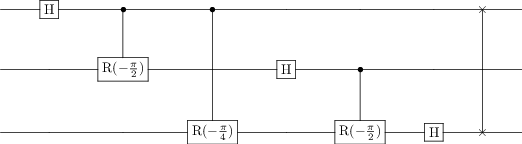

In [13]:
def QFT():
    qc = QubitCircuit(qubit_num, reverse_states=reverse_states)
    for qubit1 in range(qubit_num):
        qc.add_gate('SNOT', targets=[qubit1])
        for qubit2 in range(qubit1+1, qubit_num):
            index = abs(qubit2 - qubit1)
            index = 2 ** index
            qc.add_gate('CPHASE', controls=[qubit1], targets=[qubit2], arg_value=-pi/(index), arg_label=r'-\frac{\pi}{'+f'{index}' + r'}')
    qc.add_gate('SWAP', targets=[0, qubit_num-1])
    return qc
qft_gates = QFT()
qft_gates.png

In [14]:
qft_matrixs = qft_gates.propagators()
qft_matrix = dot(*qft_matrixs)
paresGateMatrixPd(qft_matrix)

,000,001,010,011,100,101,110,111
000,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35
001,0.35,0.35|-45,0.35|-90,0.35|-135,0.35|-180,0.35|135,0.35|90,0.35|45
010,0.35,0.35|-90,0.35|-180,0.35|90,0.35,0.35|-90,0.35|-180,0.35|90
011,0.35,0.35|-135,0.35|90,0.35|-45,0.35|-180,0.35|45,0.35|-90,0.35|135
100,0.35,0.35|-180,0.35,0.35|-180,0.35,0.35|-180,0.35,0.35|-180
101,0.35,0.35|135,0.35|-90,0.35|45,0.35|-180,0.35|-45,0.35|90,0.35|-135
110,0.35,0.35|90,0.35|-180,0.35|-90,0.35,0.35|90,0.35|-180,0.35|-90
111,0.35,0.35|45,0.35|90,0.35|135,0.35|-180,0.35|-135,0.35|-90,0.35|-45


In [15]:
parseEvolutionPd(qft_matrix, inv_qft_state)

,000,001,010,011,100,101,110,111
000: 0.35,0.35=>0.12,0.35=>0.12,0.35=>0.12,0.35=>0.12,0.35=>0.12,0.35=>0.12,0.35=>0.12,0.35=>0.12
001: 0.35|90,0.35=>0.12|90,0.35|-45=>0.12|45,0.35|-90=>0.12,0.35|-135=>0.12|-45,0.35|-180=>0.12|-90,0.35|135=>0.12|-135,0.35|90=>0.12|-180,0.35|45=>0.12|135
010: 0.35|-180,0.35=>0.12|-180,0.35|-90=>0.12|90,0.35|-180=>0.12,0.35|90=>0.12|-90,0.35=>0.12|-180,0.35|-90=>0.12|90,0.35|-180=>0.12,0.35|90=>0.12|-90
011: 0.35|-90,0.35=>0.12|-90,0.35|-135=>0.12|135,0.35|90=>0.12,0.35|-45=>0.12|-135,0.35|-180=>0.12|90,0.35|45=>0.12|-45,0.35|-90=>0.12|-180,0.35|135=>0.12|45
100: 0.35,0.35=>0.12,0.35|-180=>0.12|-180,0.35=>0.12,0.35|-180=>0.12|-180,0.35=>0.12,0.35|-180=>0.12|-180,0.35=>0.12,0.35|-180=>0.12|-180
101: 0.35|90,0.35=>0.12|90,0.35|135=>0.12|-135,0.35|-90=>0.12,0.35|45=>0.12|135,0.35|-180=>0.12|-90,0.35|-45=>0.12|45,0.35|90=>0.12|-180,0.35|-135=>0.12|-45
110: 0.35|-180,0.35=>0.12|-180,0.35|90=>0.12|-90,0.35|-180=>0.12,0.35|-90=>0.12|90,0.35=>0.12|-180,0.35|90=>0.12|-90,0.35|-180=>0.12,0.35|-90=>0.12|90
111: 0.35|-90,0.35=>0.12|-90,0.35|45=>0.12|-45,0.35|90=>0.12,0.35|135=>0.12|45,0.35|-180=>0.12|90,0.35|-135=>0.12|135,0.35|-90=>0.12|-180,0.35|-45=>0.12|-135
result,,,1.0,,,,,


In [16]:
qft_state = dot(qft_matrix, inv_qft_state)
parseStateVecPd(qft_state)

,000,001,010,011,100,101,110,111
state,,,1.0,,,,,


C:\Users\Tan Siwei\AppData\Local\conda\conda\envs\py3\lib\site-packages\qutip\qip\circuit.py:275: UserWarning: Unknown gate NCNOT
  warnings.warn("Unknown gate %s" % name)


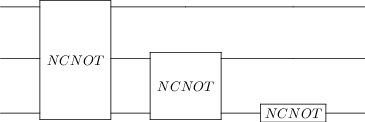

In [17]:
def add():
    qc = QubitCircuit(qubit_num, reverse_states=reverse_states)
    qc.user_gates = {"NCNOT": ncnot}
    
    for qubit in range(0, qubit_num):
        qc.add_gate("NCNOT", targets=list(range(qubit+1, qubit_num)) + [qubit], arg_value={'control_num': qubit_num-qubit-1})
    return qc
add_gates = add()
add_gates.png

In [18]:
add_matrix = dot(*add_gates.propagators())
paresGateMatrixPd(add_matrix)

,000,001,010,011,100,101,110,111
000,,,,,,,,1.0
001,1.0,,,,,,,
010,,1.0,,,,,,
011,,,1.0,,,,,
100,,,,1.0,,,,
101,,,,,1.0,,,
110,,,,,,1.0,,
111,,,,,,,1.0,


In [19]:
add_state = dot(add_matrix, inital_state)
parseStateVecPd(add_state)

,000,001,010,011,100,101,110,111
state,,1.0,,,,,,


In [20]:
add_state

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

# 密度矩阵

In [21]:
density_add_state = density(add_state)
add_state

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [22]:
add_state = changeDims(add_state)
add_state.ptrace([2])  # 最右边的是2

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [23]:
psi = tensor(basis(2, 0), basis(2, 1), basis(2, 1))
psi

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [24]:
psi.ptrace([0,1])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

# 其他的测试

In [25]:
target = 1;
N = 3;
m = gate_expand_1toN(pauli_x,N,target)
m

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

In [26]:
m.permute([2,1,0])

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

In [27]:
m.permute([1, 0, 2])

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

In [28]:
permute?

In [29]:
controlled_gate(pauli_x,3,0,1,1)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

In [30]:
controlled_gate(pauli_x,3,2,0,1)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

In [31]:
paresGateMatrixPd(pauli_x)

,0,1
0,,1.0
1,1.0,


In [32]:
state_temp = Qobj([[1],[2],[3]])
state_temp

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [2.]
 [3.]]

#  BQSKit

In [33]:
import bqskit

In [34]:
bqskit?

In [35]:
ccphase({'qubit_num': 3, 'rotation':30})

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[1.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  1.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  1.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  1.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  1.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  1.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  1.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.

In [36]:
ccphase({'qubit_num': 2, 'rotation':30})

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  1.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  1.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.8660254+0.5j]]

In [37]:
cphase(pi/6)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  1.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  1.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.8660254+0.5j]]